In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to data
file_path_joebiden = r'C:\Users\iurch\OneDrive\DataCircle\project_data\hashtag_joebiden.csv'
file_path_donaldtrump = r'C:\Users\iurch\OneDrive\DataCircle\project_data\hashtag_donaldtrump.csv'


#Columns to read
columns_to_read = ['created_at', 'tweet_id', 'tweet','likes', 'retweet_count','user_id', 'user_screen_name', 'user_join_date', 'user_followers_count', 
                   'user_location', 'lat', 'long','country', 'continent', 'state', 'state_code','collected_at']

try:
    df_joebiden = pd.read_csv(file_path_joebiden, usecols=columns_to_read,  engine='python')
    df_donaldtrump = pd.read_csv(file_path_donaldtrump, usecols=columns_to_read, engine='python')
    print("Data loaded successfully.")
    print(df_joebiden.head())
except Exception as e:
    print("Error loading data:", e)

print(df_joebiden.head())
print(df_donaldtrump.head())


Data loaded successfully.
            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:18    1.31652929585929e+18   
2  2020-10-15 00:00:20  1.3165293050069524e+18   
3  2020-10-15 00:00:21  1.3165293080815575e+18   
4  2020-10-15 00:00:22   1.316529312741253e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...   0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...   0.0            0.0   
4  #censorship #HunterBiden #Biden #BidenEmails #...   1.0            0.0   

                 user_id user_screen_name       user_join_date  \
0            360666534.0  elsollatinonews  2011-08-23 15:33:45   
1            809904438.0     Biloximeemaw  2012-09-08 01:03:57   
2           

In [2]:
# Display basic information about the datasets
print("\nDonald Trump Data:")
print(df_donaldtrump.info())


Donald Trump Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971087 entries, 0 to 971086
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            971087 non-null  object 
 1   tweet_id              971073 non-null  object 
 2   tweet                 971073 non-null  object 
 3   likes                 971045 non-null  object 
 4   retweet_count         970933 non-null  float64
 5   user_id               970929 non-null  object 
 6   user_screen_name      970933 non-null  object 
 7   user_join_date        970779 non-null  object 
 8   user_followers_count  970917 non-null  object 
 9   user_location         675830 non-null  object 
 10  lat                   445702 non-null  object 
 11  long                  445705 non-null  object 
 12  country               442732 non-null  object 
 13  continent             442749 non-null  object 
 14  state                 320614 non

In [3]:
print("\nJoe Biden Data:")
print(df_joebiden.info())


Joe Biden Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777073 entries, 0 to 777072
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            777073 non-null  object 
 1   tweet_id              776995 non-null  object 
 2   tweet                 776995 non-null  object 
 3   likes                 776914 non-null  object 
 4   retweet_count         776895 non-null  float64
 5   user_id               776889 non-null  object 
 6   user_screen_name      776895 non-null  object 
 7   user_join_date        776784 non-null  object 
 8   user_followers_count  776885 non-null  object 
 9   user_location         543063 non-null  object 
 10  lat                   355284 non-null  object 
 11  long                  355284 non-null  object 
 12  country               353770 non-null  object 
 13  continent             353788 non-null  object 
 14  state                 260191 non-nu

In [4]:
# Transforming dtypes joebiden Data
# columns to datetime
parse_dates = ['created_at', 'user_join_date', 'collected_at']
for date_column in parse_dates:
    df_joebiden[date_column] = pd.to_datetime(df_joebiden[date_column], errors='coerce')

print(df_joebiden.dtypes) 

created_at              datetime64[ns]
tweet_id                        object
tweet                           object
likes                           object
retweet_count                  float64
user_id                         object
user_screen_name                object
user_join_date          datetime64[ns]
user_followers_count            object
user_location                   object
lat                             object
long                            object
country                         object
continent                       object
state                           object
state_code                      object
collected_at            datetime64[ns]
dtype: object


In [5]:
# Transforming dtypes donald trump Data
# columns to datetime
parse_dates = ['created_at', 'user_join_date', 'collected_at']
for date_column in parse_dates:
    df_donaldtrump[date_column] = pd.to_datetime(df_donaldtrump[date_column], errors='coerce')

print(df_donaldtrump.dtypes) 

created_at              datetime64[ns]
tweet_id                        object
tweet                           object
likes                           object
retweet_count                  float64
user_id                         object
user_screen_name                object
user_join_date          datetime64[ns]
user_followers_count            object
user_location                   object
lat                             object
long                            object
country                         object
continent                       object
state                           object
state_code                      object
collected_at            datetime64[ns]
dtype: object


Now we have to transform columns to the right datatype
tweet_id                        int64
tweet                           str
likes                           float64
retweet_count                  float64
user_id                         object
user_name                       object
user_join_date          datetime64[ns]
user_followers_count            object
user_location                   object
lat                             object
long                            object
country                         object
continent                       object
state                           object
state_code                      object

In [6]:
# Convert 'tweet_id' to numeric, invalid parsing will be set as NaN
df_joebiden['tweet_id_numeric'] = pd.to_numeric(df_joebiden['tweet_id'], errors='coerce')
# Trump Tweet_ID
df_donaldtrump['tweet_id_numeric'] = pd.to_numeric(df_donaldtrump['tweet_id'], errors='coerce')

In [7]:
# Drop rows where 'tweet_id_numeric' is NaN 
df_joebiden = df_joebiden.dropna(subset=['tweet_id_numeric'])
# Trump Tweet_ID
df_donaldtrump = df_donaldtrump.dropna(subset=['tweet_id_numeric'])

In [8]:
# Now convert 'tweet_id_numeric' to 'int64'
df_joebiden['tweet_id_numeric'] = df_joebiden['tweet_id_numeric'].astype('int64')
# Trump Tweet_ID
df_donaldtrump['tweet_id_numeric'] = df_donaldtrump['tweet_id_numeric'].astype('int64')

In [9]:
#Check
df_joebiden['tweet_id_numeric'].info
df_donaldtrump['tweet_id_numeric'].info

<bound method Series.info of 0         1316529221557252096
1         1316529222748430336
2         1316529228091846912
3         1316529227471237120
4         1316529252301451264
                 ...         
971082    1325588843488276480
971083    1325588866045194240
971084    1325588885515227136
971085    1325588892905402368
971086    1325588894482534400
Name: tweet_id_numeric, Length: 970926, dtype: int64>

In [10]:
# Drop the old 'tweet_id' column 
df_joebiden = df_joebiden.drop(columns=['tweet_id']).rename(columns={'tweet_id_numeric': 'tweet_id'})
df_donaldtrump = df_donaldtrump.drop(columns=['tweet_id']).rename(columns={'tweet_id_numeric': 'tweet_id'})

In [11]:
#Cheking duplicates
df_joebiden['tweet_id'].duplicated().sum()

1856

In [12]:
df_joebiden = df_joebiden.drop_duplicates(subset=['tweet_id'])

In [13]:
df_donaldtrump['tweet_id'].duplicated().sum()

1347

In [14]:
df_donaldtrump = df_donaldtrump.drop_duplicates(subset=['tweet_id'])
df_donaldtrump['tweet_id'].duplicated().sum()

0

In [15]:
#Converting 'tweet' column to string format
df_joebiden['tweet'] = df_joebiden['tweet'].astype(str)
df_donaldtrump['tweet'] = df_donaldtrump['tweet'].astype(str)

In [16]:
df_joebiden['tweet'].duplicated().sum()

6649

In [17]:
df_donaldtrump['tweet'].duplicated().sum()

11043

In [18]:
# Drop duplicates based on 'tweet' column for the entire DataFrame
df_joebiden = df_joebiden.drop_duplicates(subset=['tweet'])
df_donaldtrump = df_donaldtrump.drop_duplicates(subset=['tweet'])

In [19]:
#Likes column cleaning

# Convert 'likes' to numeric, invalid parsing will be set as NaN
df_joebiden['likes_numeric'] = pd.to_numeric(df_joebiden['likes'], errors='coerce')
# Trump likes
df_donaldtrump['likes_numeric'] = pd.to_numeric(df_donaldtrump['likes'], errors='coerce')

In [20]:
# Drop rows where 'likes_numeric' is NaN 
df_joebiden = df_joebiden.dropna(subset=['likes_numeric'])
# Trump Tweet_ID
df_donaldtrump = df_donaldtrump.dropna(subset=['likes_numeric'])

In [21]:
# Now convert 'likes_numeric' to 'float64'
# Use .loc[] to avoid SettingWithCopyWarning
df_joebiden.loc[:, 'likes_numeric'] = df_joebiden['likes_numeric'].astype('float64')
#Trump likes column
df_donaldtrump.loc[:, 'likes_numeric'] = df_donaldtrump['likes_numeric'].astype('float64')


In [22]:
#Check
df_joebiden['likes_numeric'].info
df_donaldtrump['likes_numeric'].info

<bound method Series.info of 0           0.0
1          26.0
2           2.0
3           0.0
4           4.0
          ...  
971082      0.0
971083      4.0
971084     25.0
971085      0.0
971086    105.0
Name: likes_numeric, Length: 958528, dtype: float64>

In [23]:
# Drop the old 'likes' column 
df_joebiden = df_joebiden.drop(columns=['likes']).rename(columns={'likes_numeric': 'likes'})
df_donaldtrump = df_donaldtrump.drop(columns=['likes']).rename(columns={'likes_numeric': 'likes'})

In [24]:
# Check how many duplicate rows there are based on 'tweet_id' and 'likes'
num_duplicates = df_joebiden.duplicated(subset=['tweet_id', 'likes']).sum()
print(num_duplicates)


0


In [25]:
# Check how many duplicate rows there are based on 'tweet_id' and 'likes'
num_duplicates = df_donaldtrump.duplicated(subset=['tweet_id', 'likes']).sum()
print(num_duplicates)


0


In [26]:
print(df_joebiden.columns)

Index(['created_at', 'tweet', 'retweet_count', 'user_id', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'country', 'continent', 'state', 'state_code', 'collected_at',
       'tweet_id', 'likes'],
      dtype='object')


In [27]:
nan_likes_joe_biden = df_joebiden['likes'].isna().sum()
nan_likes_joe_biden

0

In [28]:
nan_likes_trump = df_donaldtrump['likes'].isna().sum()
nan_likes_trump

0

In [29]:
#Retweet column

nan_retweets_biden = df_joebiden['retweet_count'].isna().sum()
nan_retweets_biden

0

In [30]:
nan_retweets_trump = df_donaldtrump['retweet_count'].isna().sum()
nan_retweets_trump

0

In [31]:
# Check how many duplicate rows there are based on 'tweet_id' and 'retweet'
retweet_duplicates_trump = df_donaldtrump.duplicated(subset=['tweet_id', 'retweet_count']).sum()
print(retweet_duplicates_trump)

0


In [32]:
# Check how many duplicate rows there are based on 'tweet_id' and 'retweet'
retweet_duplicates_biden = df_joebiden.duplicated(subset=['tweet_id', 'retweet_count']).sum()
print(retweet_duplicates_biden)

0


Tweets frequency for each candidate over time period

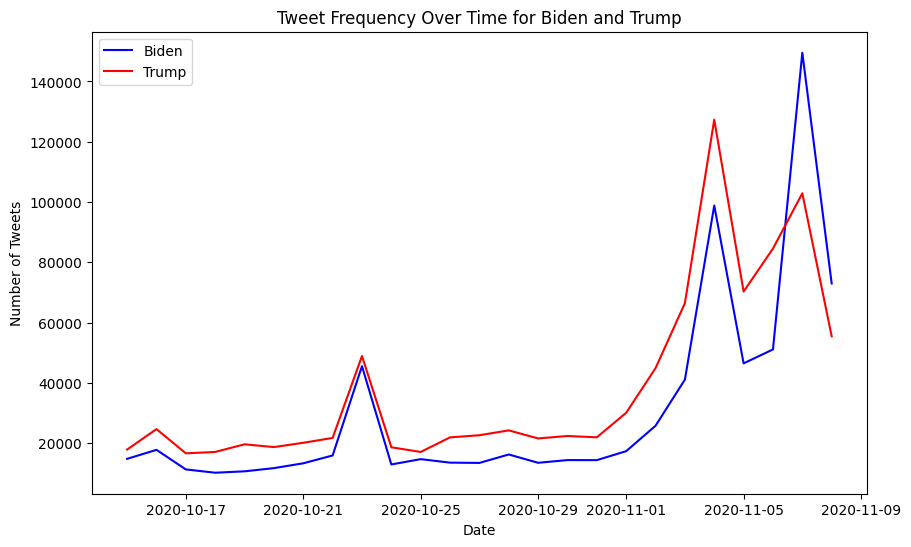

In [33]:
import matplotlib.pyplot as plt

# Group by date and count tweets for Biden
tweet_frequency_biden = df_joebiden.groupby(df_joebiden['created_at'].dt.date)['tweet_id'].count()

# Group by date and count tweets for Trump
tweet_frequency_trump = df_donaldtrump.groupby(df_donaldtrump['created_at'].dt.date)['tweet_id'].count()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(tweet_frequency_biden.index, tweet_frequency_biden.values, label='Biden', color='blue')
plt.plot(tweet_frequency_trump.index, tweet_frequency_trump.values, label='Trump', color='red')

plt.title('Tweet Frequency Over Time for Biden and Trump')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

plt.legend()

plt.show()


User activity 

In [34]:
# Tweets per user for biden
user_activity_biden = df_joebiden.groupby('user_id')['tweet_id'].count().sort_values(ascending=False)

# Display top 10 most active users
print(user_activity_biden.head(10))

user_id
1.2449822077033308e+18    1259
74268619.0                1163
874258472.0               1059
23954327.0                 922
1.0247779165409649e+18     560
755798016.0                517
1.2423507214643364e+18     486
1.304249338504401e+18      476
54361678.0                 456
386395062.0                442
Name: tweet_id, dtype: int64


In [35]:
# Tweets per user for trump
user_activity_trump = df_donaldtrump.groupby('user_id')['tweet_id'].count().sort_values(ascending=False)

# Display top 10 most active users
print(user_activity_trump.head(10))

user_id
74268619.0                1352
40173650.0                1324
4132841.0                  980
386395062.0                959
23954327.0                 921
1.0119529969079624e+18     895
208607949.0                852
1.1549521668152812e+18     785
1.1997681328327762e+18     760
9.751178113653596e+17      709
Name: tweet_id, dtype: int64


In [37]:
df_joebiden.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768380 entries, 0 to 777072
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   created_at            768380 non-null  datetime64[ns]
 1   tweet                 768380 non-null  object        
 2   retweet_count         768380 non-null  float64       
 3   user_id               768380 non-null  object        
 4   user_screen_name      768380 non-null  object        
 5   user_join_date        768274 non-null  datetime64[ns]
 6   user_followers_count  768274 non-null  object        
 7   user_location         537655 non-null  object        
 8   lat                   351707 non-null  object        
 9   long                  351707 non-null  object        
 10  country               350196 non-null  object        
 11  continent             350214 non-null  object        
 12  state                 257649 non-null  object        
 13  stat

In [38]:
# Columns to convert to numeric
columns_to_convert = ['user_id', 'user_followers_count', 'lat', 'long']
#Biden
df_joebiden['user_id_numeric'] = pd.to_numeric(df_joebiden['user_id'], errors='coerce')
df_joebiden['user_followers_count_numeric'] = pd.to_numeric(df_joebiden['user_followers_count'], errors='coerce')
df_joebiden['lat_numeric'] = pd.to_numeric(df_joebiden['lat'], errors='coerce')
df_joebiden['long_numeric'] = pd.to_numeric(df_joebiden['long'], errors='coerce')
# Trump 
df_donaldtrump['user_id_numeric'] = pd.to_numeric(df_donaldtrump['user_id'], errors='coerce')
df_donaldtrump['user_followers_count_numeric'] = pd.to_numeric(df_donaldtrump['user_followers_count'], errors='coerce')
df_donaldtrump['lat_numeric'] = pd.to_numeric(df_donaldtrump['lat'], errors='coerce')
df_donaldtrump['long_numeric'] = pd.to_numeric(df_donaldtrump['long'], errors='coerce')

In [39]:
# Drop rows where numeric is NaN 
#Biden
df_joebiden = df_joebiden.dropna(subset=['user_id_numeric'])
df_joebiden = df_joebiden.dropna(subset=['user_followers_count_numeric'])
df_joebiden = df_joebiden.dropna(subset=['lat_numeric'])
df_joebiden = df_joebiden.dropna(subset=['long_numeric'])

# Trump 
df_donaldtrump = df_donaldtrump.dropna(subset=['user_id_numeric'])
df_donaldtrump = df_donaldtrump.dropna(subset=['user_followers_count_numeric'])
df_donaldtrump = df_donaldtrump.dropna(subset=['lat_numeric'])
df_donaldtrump = df_donaldtrump.dropna(subset=['long_numeric'])

In [52]:
#Converting to int/float
#Biden
df_joebiden['user_id_numeric'] = df_joebiden['user_id_numeric'].astype('int64')
df_joebiden['user_followers_count_numeric'] = df_joebiden['user_followers_count_numeric'].astype('float64')
df_joebiden['lat_numeric'] = df_joebiden['lat_numeric'].astype('float64')
df_joebiden['long_numeric'] = df_joebiden['long_numeric'].astype('float64')

#Trump
df_donaldtrump['user_id_numeric'] = df_donaldtrump['user_id_numeric'].astype('int64')
df_donaldtrump['user_followers_count_numeric'] = df_donaldtrump['user_followers_count_numeric'].astype('float64')
df_donaldtrump['lat_numeric'] = df_donaldtrump['lat_numeric'].astype('float64')
df_donaldtrump['long_numeric'] = df_donaldtrump['long_numeric'].astype('float64')



In [ ]:
# Drop the old column 
df_joebiden = df_joebiden.drop(columns=['user_id']).rename(columns={'user_id_numeric': 'user_id'})
df_joebiden = df_joebiden.drop(columns=['user_followers_count']).rename(columns={'user_followers_count_numeric': 'user_followers_count'})
df_joebiden = df_joebiden.drop(columns=['lat']).rename(columns={'lat_numeric': 'lat'})
df_joebiden = df_joebiden.drop(columns=['long']).rename(columns={'long_numeric': 'long'})

#Trump
# df_joebiden = df_joebiden.drop(columns=['user_id']).rename(columns={'user_id_numeric': 'user_id'})
# df_joebiden = df_joebiden.drop(columns=['user_followers_count']).rename(columns={'user_followers_count_numeric': 'user_followers_count'})
# df_joebiden = df_joebiden.drop(columns=['lat']).rename(columns={'lat_numeric': 'lat'})
# df_joebiden = df_joebiden.drop(columns=['long']).rename(columns={'long_numeric': 'long'})

